# Árboles de decisión.

Es un método de aprendizaje supervisado. Dado un conjunto de datos se fabrican diagramas de construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que categorizan y representan una serie de condiciones que ocurren de forma sucesiva, para la resolución del problema.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris=load_iris()

X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=3)

dtc=DecisionTreeClassifier().fit(X_train,y_train)

print('Puntuacion entrenamiento: {:.3f}'.format(dtc.score(X_train,y_train)))
print('Puntuacion test: {:.2f}'.format(dtc.score(X_test,y_test)))

Puntuacion entrenamiento: 1.000
Puntuacion test: 0.97


Como podemos intuir, al adaptarse tanto a los datos de entranamiento, es un método que tiende al overfitting. Para paliar esto, se emplean variables adicionales:<br>
* max_depth: Profundidiad máxima del árbol. Es el que realmente más influye en el modelo.
* max_leaf_nodes.
* min_samples_leaf

In [2]:
dtc2=DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

print('Puntuacion entrenamiento: {:.3f}'.format(dtc2.score(X_train,y_train)))
print('Puntuacion test: {:.2f}'.format(dtc2.score(X_test,y_test)))

Puntuacion entrenamiento: 0.982
Puntuacion test: 0.97


Como se puede intuir, hay variables más importantes que otras, se representan con un número del 0 al 1. La suma de todos lógicamente es 1.

<IPython.core.display.Javascript object>


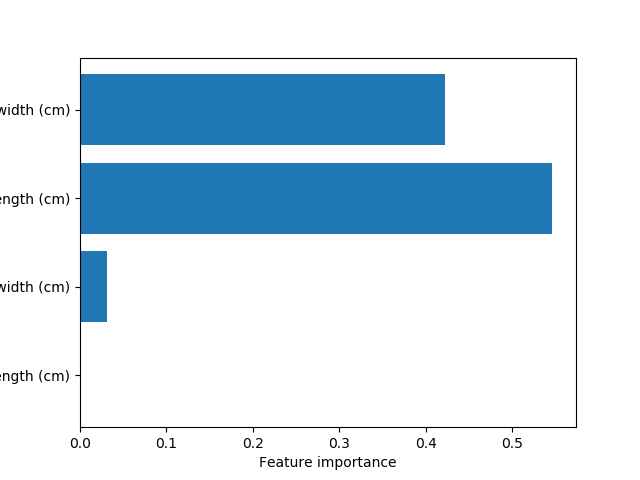

Feature importance: [0.         0.03128242 0.54643762 0.42227996]
1.0


In [3]:
from adspy_shared_utilities import plot_feature_importances

plt.figure()
plot_feature_importances(dtc,iris.feature_names)
plt.show()

print('Feature importance: {}'.format(dtc.feature_importances_))
print(sum(dtc.feature_importances_))

<IPython.core.display.Javascript object>


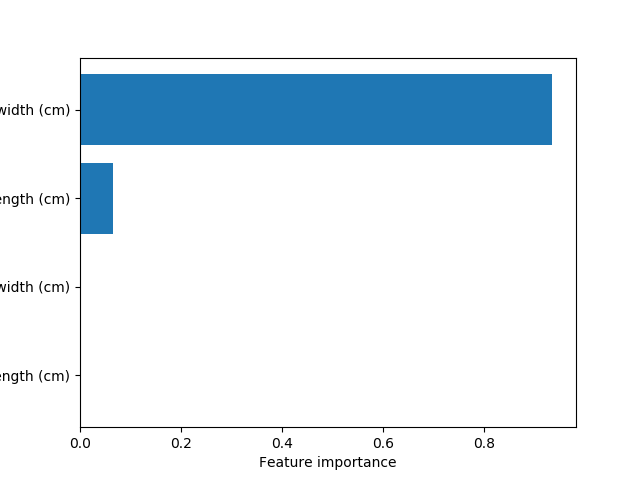

Feature importance: [0.         0.03128242 0.54643762 0.42227996]
1.0


In [4]:
from adspy_shared_utilities import plot_feature_importances

plt.figure()
plot_feature_importances(dtc2,iris.feature_names)
plt.show()

print('Feature importance: {}'.format(dtc.feature_importances_))
print(sum(dtc2.feature_importances_))

Veamos internamente que hace el método:<br>
<a href="https://imgur.com/a1GkHmk"><img src="https://i.imgur.com/a1GkHmk.png" title="source: imgur.com" /></a>

Veamos qué hay en cada cuadrado:<br>
* Longitud pétado: Característica de clasificación.
* Muestras: Número de muestras que hay en ese punto.
* Valor: Lista de cuántas muestras tiene cada clase.

Existen dos tipos de nodos:<br>
* Nodo Puro: Sólo hay muestras de una clase.
* Nodo Mixto: No hay muestras de sólo una clase, luego hay que seguir ajustando.

Como ventajas de este modelo:<br>
* Fácil de interpretar.
* No necesita información.

Como desventaja principal es la tendencia del modelo al overfitting.